# PRE - PARCIAL 2 | MÉTODOS COMPUTACIONALES II

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# GET EULER

## RUNGE - KUTTA 4

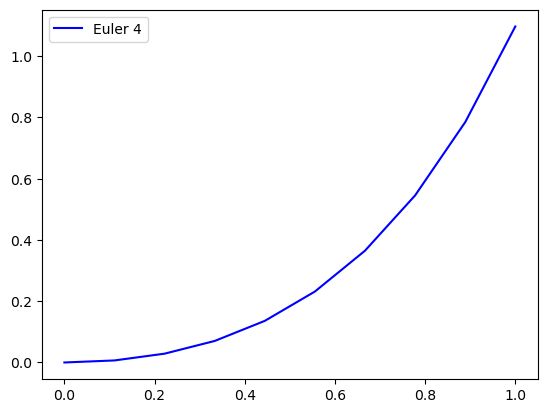

In [2]:
def GetEuler4(x, y, h):
    for i in range(1, len(x)):
        k1 = f(x[i-1], y[i-1])
        k2 = f(x[i-1] + 0.5*h, y[i-1] + 0.5*h*k1)
        k3 = f(x[i-1] + 0.5*h, y[i-1] + 0.5*h*k2)
        k4 = f(x[i-1] + h, y[i-1] + h*k3)
        
        y[i] = y[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        
def f(x,y):
    return x + 2*y #Función que tocaría cambiar

N = 10
t = np.linspace(0,1,N)
h = t[1] - t[0]
y4 = np.zeros_like(t)
y4[0] = 0.

GetEuler4(t, y4, h)

plt.plot(t, y4, label='Euler 4', color = 'blue')
plt.legend()
plt.show()

## ADAMS - BASHFORTH 4

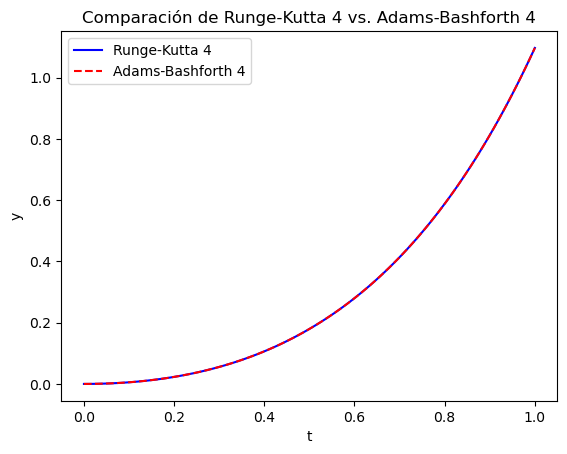

In [3]:
def f(x, y):
    return x + 2*y  # Función de ejemplo, puede ser cambiada según el problema

def RungeKutta4(x, y, h):
    for i in range(1, len(x)):
        k1 = f(x[i-1], y[i-1])
        k2 = f(x[i-1] + 0.5*h, y[i-1] + 0.5*k1*h)
        k3 = f(x[i-1] + 0.5*h, y[i-1] + 0.5*k2*h)
        k4 = f(x[i-1] + h, y[i-1] + k3*h)
        
        y[i] = y[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return y

def AdamsBashforth4(x, y, h):
    for i in range(1, 4):
        k1 = f(x[i-1], y[i-1])
        k2 = f(x[i-1] + 0.5*h, y[i-1] + 0.5*k1*h)
        k3 = f(x[i-1] + 0.5*h, y[i-1] + 0.5*k2*h)
        k4 = f(x[i-1] + h, y[i-1] + k3*h)
        y[i] = y[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    
    for i in range(3, len(x) - 1):
        y[i + 1] = y[i] + (h/24)*(55*f(x[i], y[i]) - 59*f(x[i-1], y[i-1]) + 37*f(x[i-2], y[i-2]) - 9*f(x[i-3], y[i-3]))
    return y

N = 100  # Aumentar el número de puntos para una mejor resolución
t = np.linspace(0, 1, N)
h = t[1] - t[0]

# Inicialización para Runge-Kutta y Adams-Bashforth
y_rk4 = np.zeros_like(t)
y_ab4 = np.zeros_like(t)
y_rk4[0] = 0.  # Condición inicial
y_ab4[0] = 0.  # Condición inicial

# Ejecutar los métodos
y_rk4 = RungeKutta4(t, y_rk4, h)
y_ab4 = AdamsBashforth4(t, y_ab4, h)

# Graficar resultados
plt.plot(t, y_rk4, label='Runge-Kutta 4', color='blue')
plt.plot(t, y_ab4, label='Adams-Bashforth 4', color='red', linestyle='--')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Comparación de Runge-Kutta 4 vs. Adams-Bashforth 4')
plt.show()

## ADAMS - MOULTON 5

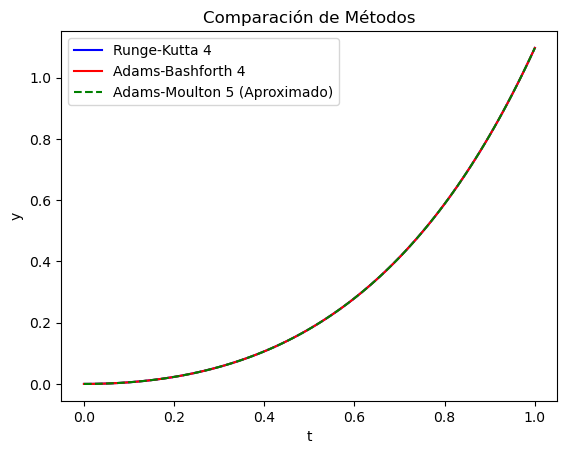

In [4]:
def f(x, y):
    return x + 2*y  # Esta es la función de ejemplo, cambie según sea necesario

def RungeKutta4(x, y, h):
    for i in range(1, len(x)):
        k1 = f(x[i-1], y[i-1])
        k2 = f(x[i-1] + 0.5*h, y[i-1] + 0.5*k1*h)
        k3 = f(x[i-1] + 0.5*h, y[i-1] + 0.5*k2*h)
        k4 = f(x[i-1] + h, y[i-1] + k3*h)
        
        y[i] = y[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return y

def AdamsBashforth4(x, y, h):
    # Inicializar con Runge-Kutta 4
    y = RungeKutta4(x, y, h)
    
    for i in range(3, len(x) - 1):
        y[i+1] = y[i] + (h/24)*(55*f(x[i], y[i]) - 59*f(x[i-1], y[i-1]) + 37*f(x[i-2], y[i-2]) - 9*f(x[i-3], y[i-3]))
    return y

def AdamsMoulton5(x, y, h):
    # Inicializar con Adams-Bashforth 4
    y = AdamsBashforth4(x, y, h)
    
    for i in range(3, len(x) - 1):
        # Utilizamos y[i+1] obtenido de Adams-Bashforth 4 como valor inicial
        y[i+1] = y[i] + (h/24)*(9*f(x[i+1], y[i+1]) + 19*f(x[i], y[i]) - 5*f(x[i-1], y[i-1]) + f(x[i-2], y[i-2]))
    return y

# Parámetros
N = 100
t = np.linspace(0, 1, N)
h = t[1] - t[0]
y0 = 0  # Condición inicial

# Inicialización
y_rk4 = np.zeros_like(t)
y_ab4 = np.zeros_like(t)
y_am5 = np.zeros_like(t)
y_rk4[0] = y0
y_ab4[0] = y0
y_am5[0] = y0

# Ejecución de los métodos
y_rk4 = RungeKutta4(t, y_rk4, h)
y_ab4 = AdamsBashforth4(t, y_ab4, h)
y_am5 = AdamsMoulton5(t, y_am5, h)

# Gráfica
plt.plot(t, y_rk4, label='Runge-Kutta 4', color='blue')
plt.plot(t, y_ab4, label='Adams-Bashforth 4', color='red')
plt.plot(t, y_am5, label='Adams-Moulton 5 (Aproximado)', color='green', linestyle='--')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Comparación de Métodos')
plt.show()

# COMPLEX EULER

## RUNGE - KUTTA 4

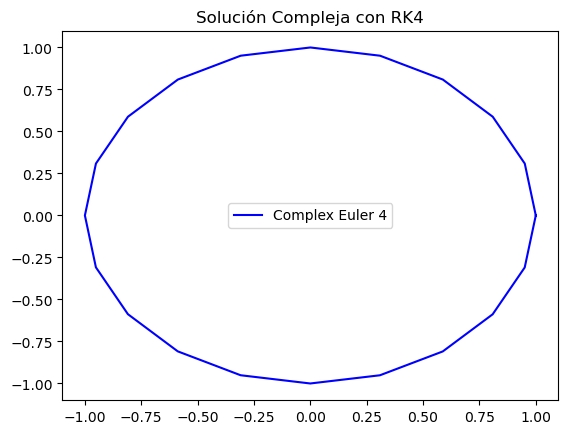

In [5]:
def fc(z):
    return 1j*z # Función que tocaría cambiar

def ComplexEuler4():
    global theta
    global h_
    global f
    
    theta += h_
    
    k1 = fc(f)
    k2 = fc(f + h_*k1/2)
    k3 = fc(f + h_*k2/2)
    k4 = fc(f + h_*k3)
    
    f += (h_/6)*(k1 + 2*k2 + 2*k3 + k4)

theta = 0.

N = 20
Vueltas = 1

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion4 = np.array([theta, f]) 

for i in range(N):
    ComplexEuler4()
    Solucion4 = np.vstack([Solucion4, np.array([theta, f])])

Re4 = np.real(Solucion4[:, 1])
Im4 = np.imag(Solucion4[:, 1])

plt.plot(Re4, Im4, label="Complex Euler 4", color = 'blue')
plt.title("Solución Compleja con RK4")
plt.legend()
plt.show()

## ADAMS - BASHFORTH 4 

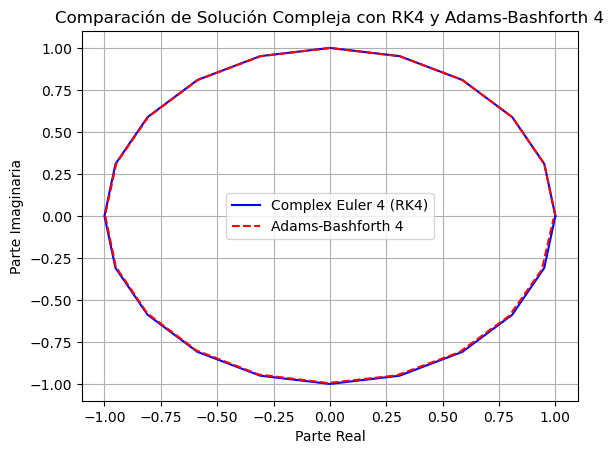

In [6]:
# Función que define la derivada
def fc(z):
    return 1j*z

# Método de Euler complejo usando RK4
def ComplexEuler4():
    global theta
    global h_
    global f
    
    theta += h_
    
    k1 = fc(f)
    k2 = fc(f + h_*k1/2)
    k3 = fc(f + h_*k2/2)
    k4 = fc(f + h_*k3)
    
    f += (h_/6)*(k1 + 2*k2 + 2*k3 + k4)

# Implementación del método Adams-Bashforth de 4 pasos
def AdamsBashforth4():
    global theta
    global h_
    global f
    global f_history
    
    theta += h_
    
    if len(f_history) < 4:
        # Uso de RK4 para los primeros pasos
        k1 = fc(f)
        k2 = fc(f + h_*k1/2)
        k3 = fc(f + h_*k2/2)
        k4 = fc(f + h_*k3)
        f += (h_/6)*(k1 + 2*k2 + 2*k3 + k4)
    else:
        f += (h_/24)*(55*fc(f_history[-1]) - 59*fc(f_history[-2]) + 37*fc(f_history[-3]) - 9*fc(f_history[-4]))
    
    # Actualizar el historial
    f_history.append(f)

# Configuración inicial
theta = 0.
N = 20
Vueltas = 1
h_ = Vueltas * 2*np.pi/N
f = 1

# Solución usando RK4
Solucion4 = np.array([theta, f]) 
for i in range(N):
    ComplexEuler4()
    Solucion4 = np.vstack([Solucion4, np.array([theta, f])])

Re4 = np.real(Solucion4[:, 1])
Im4 = np.imag(Solucion4[:, 1])

# Restablecer para Adams-Bashforth
theta = 0.
f = 1
f_history = []

# Solución usando Adams-Bashforth 4
SolucionAB4 = np.array([theta, f])
for i in range(N):
    AdamsBashforth4()
    SolucionAB4 = np.vstack([SolucionAB4, np.array([theta, f])])

ReAB4 = np.real(SolucionAB4[:, 1])
ImAB4 = np.imag(SolucionAB4[:, 1])

plt.plot(Re4, Im4, label="Complex Euler 4 (RK4)", color='blue')
plt.plot(ReAB4, ImAB4, label="Adams-Bashforth 4", color='red', linestyle='--')

plt.title("Comparación de Solución Compleja con RK4 y Adams-Bashforth 4")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginaria")
plt.legend()
plt.grid(True)
plt.show()

## ADAMS - MOULTON 5 

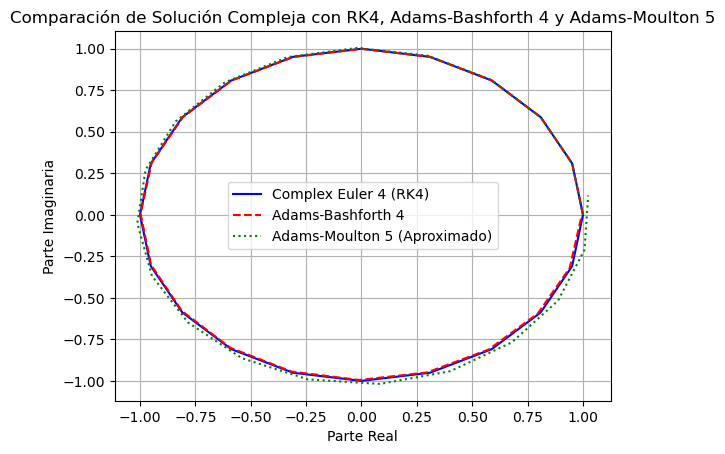

In [7]:
# Función que define la derivada
def fc(z):
    return 1j*z

# Método de Euler complejo usando RK4
def ComplexEuler4():
    global theta
    global h_
    global f
    
    theta += h_
    
    k1 = fc(f)
    k2 = fc(f + h_*k1/2)
    k3 = fc(f + h_*k2/2)
    k4 = fc(f + h_*k3)
    
    f += (h_/6)*(k1 + 2*k2 + 2*k3 + k4)

# Implementación del método Adams-Bashforth de 4 pasos
def AdamsBashforth4():
    global theta
    global h_
    global f
    global f_history
    
    theta += h_
    
    if len(f_history) < 4:
        # Uso de RK4 para los primeros pasos
        k1 = fc(f)
        k2 = fc(f + h_*k1/2)
        k3 = fc(f + h_*k2/2)
        k4 = fc(f + h_*k3)
        f += (h_/6)*(k1 + 2*k2 + 2*k3 + k4)
    else:
        f += (h_/24)*(55*fc(f_history[-1]) - 59*fc(f_history[-2]) + 37*fc(f_history[-3]) - 9*fc(f_history[-4]))
    
    # Actualizar el historial
    f_history.append(f)

# Configuración inicial
theta = 0.
N = 20
Vueltas = 1
h_ = Vueltas * 2*np.pi/N
f = 1

# Solución usando RK4
Solucion4 = np.array([theta, f]) 
for i in range(N):
    ComplexEuler4()
    Solucion4 = np.vstack([Solucion4, np.array([theta, f])])

Re4 = np.real(Solucion4[:, 1])
Im4 = np.imag(Solucion4[:, 1])

# Restablecer para Adams-Bashforth
theta = 0.
f = 1
f_history = []

# Solución usando Adams-Bashforth 4
SolucionAB4 = np.array([theta, f])
for i in range(N):
    AdamsBashforth4()
    SolucionAB4 = np.vstack([SolucionAB4, np.array([theta, f])])

ReAB4 = np.real(SolucionAB4[:, 1])
ImAB4 = np.imag(SolucionAB4[:, 1])

def AdamsMoulton5():
    global theta
    global h_
    global f
    global f_history
    
    # Aproximación inicial de f_{n+1} usando el valor actual de f
    f_approx = f + h_ * fc(f)
    
    # Usar la aproximación de f_{n+1} para calcular y_{n+1}
    if len(f_history) < 2:
        # Uso de RK4 para los primeros pasos, ya que necesitamos al menos 2 puntos históricos
        k1 = fc(f)
        k2 = fc(f + h_*k1/2)
        k3 = fc(f + h_*k2/2)
        k4 = fc(f + h_*k3)
        f += (h_/6)*(k1 + 2*k2 + 2*k3 + k4)
    else:
        f += (h_/12)*(5*fc(f_approx) + 8*fc(f_history[-1]) - fc(f_history[-2]))
    
    # Actualizar el historial
    f_history.append(f)
    theta += h_

# Restablecer para Adams-Moulton 5
theta = 0.
f = 1
f_history = []

# Solución usando Adams-Moulton 5
SolucionAM5 = np.array([theta, f])
for i in range(N):
    AdamsMoulton5()
    SolucionAM5 = np.vstack([SolucionAM5, np.array([theta, f])])

ReAM5 = np.real(SolucionAM5[:, 1])
ImAM5 = np.imag(SolucionAM5[:, 1])

# Graficar los resultados

plt.plot(Re4, Im4, label="Complex Euler 4 (RK4)", color='blue')
plt.plot(ReAB4, ImAB4, label="Adams-Bashforth 4", color='red', linestyle='--')
plt.plot(ReAM5, ImAM5, label="Adams-Moulton 5 (Aproximado)", color='green', linestyle=':')

plt.title("Comparación de Solución Compleja con RK4, Adams-Bashforth 4 y Adams-Moulton 5")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginaria")
plt.legend()
plt.grid(True)
plt.show()

# SISTEMA DE ECUACIONES

## RUNGE - KUTTA 4 

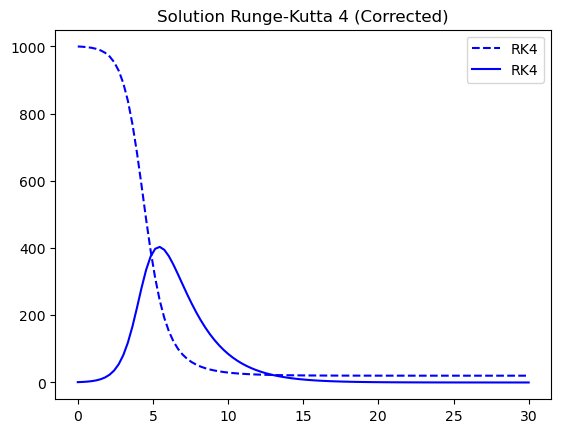

In [8]:
def System(r,t,beta,gamma):
    
    # Derivadas con respecto al tiempo
    dsdt = -beta*r[0]*r[1]
    didt =  beta*r[0]*r[1] - gamma*r[1]

    return [dsdt,didt]

t = np.linspace(0,30,100)
beta = 0.002
gamma = 0.5
r0 = [1000,1]

# Sistema de Ecuaciones que tocaría cambiar
def f0(S,I,beta,gamma):
    return -beta*S*I

def f1(S,I,beta,gamma):
    return beta*S*I - gamma*I

def GetEuler4System(f0,f1,r0,t):
    
    h = t[1] - t[0]
    
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    
    # Initial condition
    S[0] =r0[0]
    I[0] =r0[1]
    
    # Vectorizacion de las pendientes
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    K3 = np.zeros(2)
    K4 = np.zeros(2)
    
    for i in range(1,len(t)):
        
        xn = S[i-1]
        yn = I[i-1]

        K1[0] = f0(xn, yn, beta, gamma)
        K1[1] = f1(xn, yn, beta, gamma)

        K2[0] = f0(xn + 0.5 * h * K1[0], yn + 0.5 * h * K1[1], beta, gamma)
        K2[1] = f1(xn + 0.5 * h * K1[0], yn + 0.5 * h * K1[1], beta, gamma)

        K3[0] = f0(xn + 0.5 * h * K1[0], yn + 0.5 * h * K2[1], beta, gamma)
        K3[1] = f1(xn + 0.5 * h * K1[0], yn + 0.5 * h * K2[1], beta, gamma)

        K4[0] = f0(xn + h * K1[0], yn + h * K3[1], beta, gamma)
        K4[1] = f1(xn + h * K1[0], yn + h * K3[1], beta, gamma)

        S[i] = xn + (h / 6) * (K1[0] + 2 * K2[0] + 2 * K3[0] + K4[0])
        I[i] = yn + (h / 6) * (K1[1] + 2 * K2[1] + 2 * K3[1] + K4[1])
        
    return S,I

S4,I4 = GetEuler4System(f0,f1,r0,t)

plt.plot(t,S4,label='RK4', color = 'blue', linestyle = 'dashed')
plt.plot(t,I4,label='RK4', color = 'blue')
plt.title('Solution Runge-Kutta 4 (Corrected)')
plt.legend()

## ADAMS - BASHFORTH 4

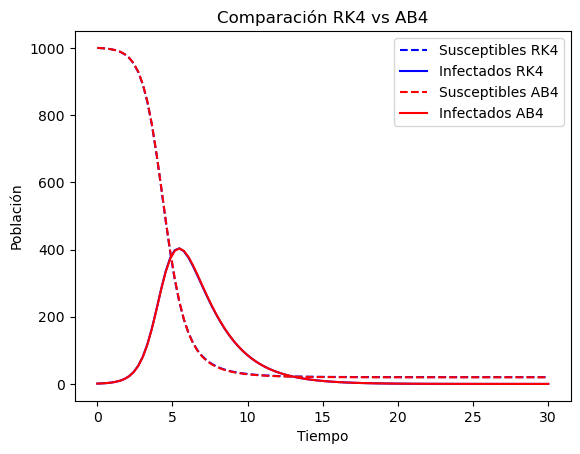

In [9]:
def GetAdamsBashforth4System(f0, f1, r0, t):
    h = t[1] - t[0]
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    S[0], I[0] = r0

    # Primero, usar RK4 para calcular los primeros 4 puntos
    for i in range(1, 4):
        xn, yn = S[i-1], I[i-1]
        K1 = [f0(xn, yn, beta, gamma), f1(xn, yn, beta, gamma)]
        K2 = [f0(xn + 0.5 * h * K1[0], yn + 0.5 * h * K1[1], beta, gamma),
              f1(xn + 0.5 * h * K1[0], yn + 0.5 * h * K1[1], beta, gamma)]
        K3 = [f0(xn + 0.5 * h * K2[0], yn + 0.5 * h * K2[1], beta, gamma),
              f1(xn + 0.5 * h * K2[0], yn + 0.5 * h * K2[1], beta, gamma)]
        K4 = [f0(xn + h * K3[0], yn + h * K3[1], beta, gamma),
              f1(xn + h * K3[0], yn + h * K3[1], beta, gamma)]
        S[i] = xn + (h / 6) * (K1[0] + 2 * K2[0] + 2 * K3[0] + K4[0])
        I[i] = yn + (h / 6) * (K1[1] + 2 * K2[1] + 2 * K3[1] + K4[1])

    # Aplicar AB4 para los puntos restantes
    for i in range(4, len(t)):
        S[i] = S[i-1] + (h / 24) * (55 * f0(S[i-1], I[i-1], beta, gamma) -
                                   59 * f0(S[i-2], I[i-2], beta, gamma) +
                                   37 * f0(S[i-3], I[i-3], beta, gamma) -
                                   9 * f0(S[i-4], I[i-4], beta, gamma))
        I[i] = I[i-1] + (h / 24) * (55 * f1(S[i-1], I[i-1], beta, gamma) -
                                   59 * f1(S[i-2], I[i-2], beta, gamma) +
                                   37 * f1(S[i-3], I[i-3], beta, gamma) -
                                   9 * f1(S[i-4], I[i-4], beta, gamma))
    return S, I

# Cálculo de soluciones usando RK4 y Adams-Bashforth de 4 puntos
S4_RK, I4_RK = GetEuler4System(f0, f1, r0, t)  # Soluciones con RK4
S4_AB, I4_AB = GetAdamsBashforth4System(f0, f1, r0, t)  # Soluciones con AB4


# Soluciones RK4
plt.plot(t, S4_RK, label='Susceptibles RK4', color='blue', linestyle='dashed')
plt.plot(t, I4_RK, label='Infectados RK4', color='blue')

# Soluciones AB4
plt.plot(t, S4_AB, label='Susceptibles AB4', color='red', linestyle='dashed')
plt.plot(t, I4_AB, label='Infectados AB4', color='red')

plt.title('Comparación RK4 vs AB4')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.legend()
plt.show()

## ADAMS - MOULTON 5

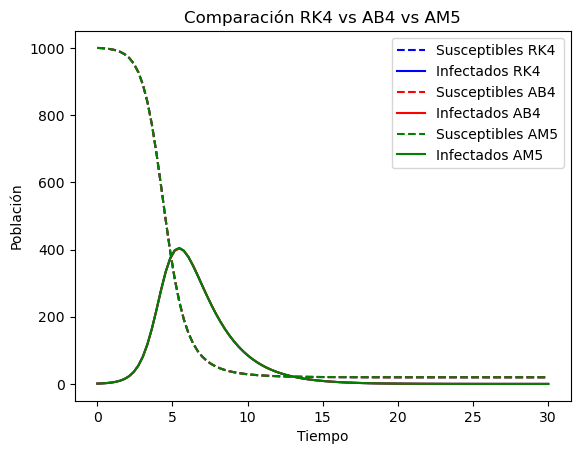

In [10]:
def f0(S, I, beta, gamma):
    return -beta * S * I

def f1(S, I, beta, gamma):
    return beta * S * I - gamma * I

def GetEuler4System(f0, f1, r0, t):
    h = t[1] - t[0]
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    S[0], I[0] = r0

    for i in range(1, len(t)):
        xn, yn = S[i-1], I[i-1]
        K1 = [f0(xn, yn, beta, gamma), f1(xn, yn, beta, gamma)]
        K2 = [f0(xn + 0.5 * h * K1[0], yn + 0.5 * h * K1[1], beta, gamma), f1(xn + 0.5 * h * K1[0], yn + 0.5 * h * K1[1], beta, gamma)]
        K3 = [f0(xn + 0.5 * h * K2[0], yn + 0.5 * h * K2[1], beta, gamma), f1(xn + 0.5 * h * K2[0], yn + 0.5 * h * K2[1], beta, gamma)]
        K4 = [f0(xn + h * K3[0], yn + h * K3[1], beta, gamma), f1(xn + h * K3[0], yn + h * K3[1], beta, gamma)]
        S[i] = xn + (h / 6) * (K1[0] + 2 * K2[0] + 2 * K3[0] + K4[0])
        I[i] = yn + (h / 6) * (K1[1] + 2 * K2[1] + 2 * K3[1] + K4[1])
    return S, I

def GetAdamsBashforth4System(f0, f1, r0, t):
    h = t[1] - t[0]
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    S[0], I[0] = r0

    # Usar RK4 para los primeros 4 puntos
    for i in range(1, 4):
        xn, yn = S[i-1], I[i-1]
        K1 = [f0(xn, yn, beta, gamma), f1(xn, yn, beta, gamma)]
        K2 = [f0(xn + 0.5 * h * K1[0], yn + 0.5 * h * K1[1], beta, gamma), f1(xn + 0.5 * h * K1[0], yn + 0.5 * h * K1[1], beta, gamma)]
        K3 = [f0(xn + 0.5 * h * K2[0], yn + 0.5 * h * K2[1], beta, gamma), f1(xn + 0.5 * h * K2[0], yn + 0.5 * h * K2[1], beta, gamma)]
        K4 = [f0(xn + h * K3[0], yn + h * K3[1], beta, gamma), f1(xn + h * K3[0], yn + h * K3[1], beta, gamma)]
        S[i] = xn + (h / 6) * (K1[0] + 2 * K2[0] + 2 * K3[0] + K4[0])
        I[i] = yn + (h / 6) * (K1[1] + 2 * K2[1] + 2 * K3[1] + K4[1])

    # Aplicar AB4 para los puntos restantes
    for i in range(4, len(t)):
        S[i] = S[i-1] + (h / 24) * (55 * f0(S[i-1], I[i-1], beta, gamma) - 59 * f0(S[i-2], I[i-2], beta, gamma) + 37 * f0(S[i-3], I[i-3], beta, gamma) - 9 * f0(S[i-4], I[i-4], beta, gamma))
        I[i] = I[i-1] + (h / 24) * (55 * f1(S[i-1], I[i-1], beta, gamma) - 59 * f1(S[i-2], I[i-2], beta, gamma) + 37 * f1(S[i-3], I[i-3], beta, gamma) - 9 * f1(S[i-4], I[i-4], beta, gamma))
    return S, I

def GetAdamsMoulton5System(f0, f1, r0, t):
    h = t[1] - t[0]
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    S[0], I[0] = r0

    # Usar RK4 para los primeros 4 puntos
    for i in range(1, 4):
        xn, yn = S[i-1], I[i-1]
        K1 = [f0(xn, yn, beta, gamma), f1(xn, yn, beta, gamma)]
        K2 = [f0(xn + 0.5 * h * K1[0], yn + 0.5 * h * K1[1], beta, gamma), f1(xn + 0.5 * h * K1[0], yn + 0.5 * h * K1[1], beta, gamma)]
        K3 = [f0(xn + 0.5 * h * K2[0], yn + 0.5 * h * K2[1], beta, gamma), f1(xn + 0.5 * h * K2[0], yn + 0.5 * h * K2[1], beta, gamma)]
        K4 = [f0(xn + h * K3[0], yn + h * K3[1], beta, gamma), f1(xn + h * K3[0], yn + h * K3[1], beta, gamma)]
        S[i] = xn + (h / 6) * (K1[0] + 2 * K2[0] + 2 * K3[0] + K4[0])
        I[i] = yn + (h / 6) * (K1[1] + 2 * K2[1] + 2 * K3[1] + K4[1])

    # Aplicar Adams-Moulton "5 puntos" para los puntos restantes
    for i in range(4, len(t)):
        S_approx = S[i-1] + (h / 24) * (55 * f0(S[i-1], I[i-1], beta, gamma) - 59 * f0(S[i-2], I[i-2], beta, gamma) + 37 * f0(S[i-3], I[i-3], beta, gamma) - 9 * f0(S[i-4], I[i-4], beta, gamma))
        I_approx = I[i-1] + (h / 24) * (55 * f1(S[i-1], I[i-1], beta, gamma) - 59 * f1(S[i-2], I[i-2], beta, gamma) + 37 * f1(S[i-3], I[i-3], beta, gamma) - 9 * f1(S[i-4], I[i-4], beta, gamma))
        S[i] = S[i-1] + (h / 12) * (5 * f0(S_approx, I_approx, beta, gamma) + 8 * f0(S[i-1], I[i-1], beta, gamma) - f0(S[i-2], I[i-2], beta, gamma))
        I[i] = I[i-1] + (h / 12) * (5 * f1(S_approx, I_approx, beta, gamma) + 8 * f1(S[i-1], I[i-1], beta, gamma) - f1(S[i-2], I[i-2], beta, gamma))
    return S, I

# Parámetros y condiciones iniciales
t = np.linspace(0, 30, 100)
beta = 0.002
gamma = 0.5
r0 = [1000, 1]

# Cálculo de soluciones usando RK4, AB4, y AM5
S4_RK, I4_RK = GetEuler4System(f0, f1, r0, t)  # RK4
S4_AB, I4_AB = GetAdamsBashforth4System(f0, f1, r0, t)  # AB4
S5_AM, I5_AM = GetAdamsMoulton5System(f0, f1, r0, t)  # AM5


plt.plot(t, S4_RK, label='Susceptibles RK4', color='blue', linestyle='dashed')
plt.plot(t, I4_RK, label='Infectados RK4', color='blue')

plt.plot(t, S4_AB, label='Susceptibles AB4', color='red', linestyle='dashed')
plt.plot(t, I4_AB, label='Infectados AB4', color='red')

plt.plot(t, S5_AM, label='Susceptibles AM5', color='green', linestyle='dashed')
plt.plot(t, I5_AM, label='Infectados AM5', color='green')

plt.title('Comparación RK4 vs AB4 vs AM5')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.legend()
plt.show()